In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [76]:
titanic_train = pd.read_csv('train.csv')

In [5]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
titanic_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:xlabel='Survived', ylabel='count'>

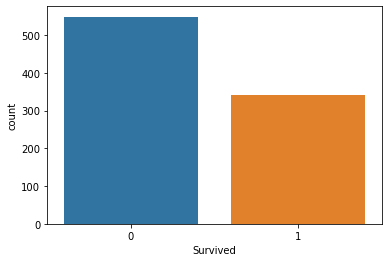

In [10]:
sns.countplot(x='Survived', data=titanic_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

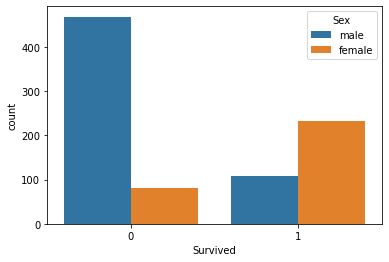

In [11]:
sns.countplot(x='Survived', data=titanic_train, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

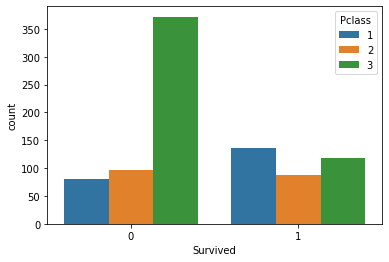

In [12]:
sns.countplot(x='Survived', data=titanic_train, hue='Pclass')

<AxesSubplot:>

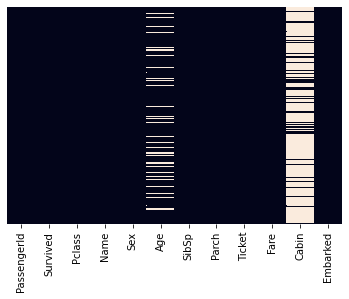

In [13]:
sns.heatmap(titanic_train.isnull(),yticklabels=False, cbar=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

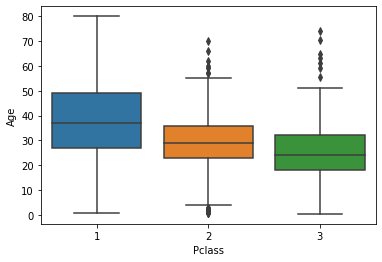

In [14]:
sns.boxplot(x='Pclass', y='Age', data=titanic_train)

In [77]:
age_1 = titanic_train[(titanic_train['Pclass'] == 1) & ~(titanic_train['Age'].isnull())]['Age'].mean()

In [78]:
age_1

38.233440860215055

In [79]:
titanic_train['Age'] =  titanic_train[['Age', 'Pclass']].apply(lambda x: age_1 if pd.isnull(x['Age']) and x['Pclass'] == 1 else x['Age'], axis=1)

In [83]:
age_2 = titanic_train[(titanic_train['Pclass'] == 2) & ~(titanic_train['Age'].isnull())]['Age'].mean()

In [86]:
titanic_train['Age'] =  titanic_train[['Age', 'Pclass']].apply(lambda x: age_2 if pd.isnull(x['Age']) and x['Pclass'] == 2 else x['Age'], axis=1)

In [87]:
age_3 = titanic_train[(titanic_train['Pclass'] == 3) & ~(titanic_train['Age'].isnull())]['Age'].mean()

In [89]:
titanic_train['Age'] =  titanic_train[['Age', 'Pclass']].apply(lambda x: age_3 if pd.isnull(x['Age']) and x['Pclass'] == 3 else x['Age'], axis=1)

<AxesSubplot:>

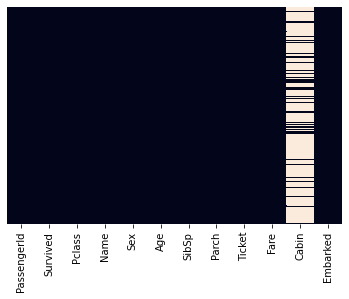

In [90]:
sns.heatmap(titanic_train.isnull(),yticklabels=False, cbar=False)

In [91]:
titanic_train.drop('Cabin', axis=1, inplace=True)

In [92]:
sex = pd.get_dummies(titanic_train['Sex'], drop_first=True)

In [94]:
embarked = pd.get_dummies(titanic_train['Embarked'], drop_first=True)

In [98]:
titanic_train = pd.concat([titanic_train, sex, embarked], axis=1)

In [101]:
titanic_train.drop(['Embarked', 'Sex', 'Name','Ticket'], inplace=True, axis=1)

In [108]:
titanic_test = pd.read_csv('test.csv')

<AxesSubplot:>

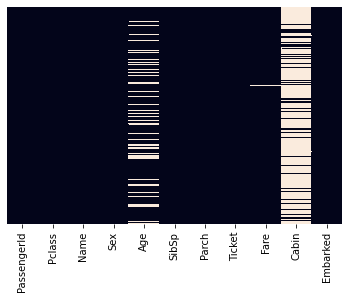

In [109]:
sns.heatmap(titanic_test.isnull(),yticklabels=False, cbar=False)

In [111]:
test_age_1 = titanic_test[(titanic_test['Pclass'] == 1) & ~(titanic_test['Age'].isnull())]['Age'].mean()

In [112]:
titanic_test['Age'] =  titanic_test[['Age', 'Pclass']].apply(lambda x: test_age_1 if pd.isnull(x['Age']) and x['Pclass'] == 1 else x['Age'], axis=1)

In [113]:
test_age_2 = titanic_test[(titanic_test['Pclass'] == 2) & ~(titanic_test['Age'].isnull())]['Age'].mean()

In [114]:
titanic_test['Age'] =  titanic_test[['Age', 'Pclass']].apply(lambda x: test_age_2 if pd.isnull(x['Age']) and x['Pclass'] == 2 else x['Age'], axis=1)

In [115]:
test_age_3 = titanic_test[(titanic_test['Pclass'] == 3) & ~(titanic_test['Age'].isnull())]['Age'].mean()

In [116]:
titanic_test['Age'] =  titanic_test[['Age', 'Pclass']].apply(lambda x: test_age_3 if pd.isnull(x['Age']) and x['Pclass'] == 3 else x['Age'], axis=1)

In [117]:
sex = pd.get_dummies(titanic_test['Sex'], drop_first=True)

In [118]:
embarked = pd.get_dummies(titanic_test['Embarked'], drop_first=True)

In [119]:
titanic_test = pd.concat([titanic_test, sex, embarked], axis=1)

In [120]:
titanic_test.drop(['Embarked', 'Sex', 'Name','Ticket','Cabin'], inplace=True, axis=1)

<AxesSubplot:>

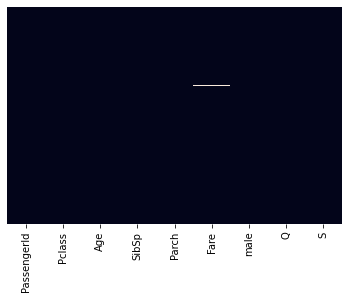

In [122]:
sns.heatmap(titanic_test.isnull(),yticklabels=False, cbar=False)

In [123]:
titanic_test.dropna(inplace=True)

In [124]:
titanic_train.dropna(inplace=True)

<AxesSubplot:>

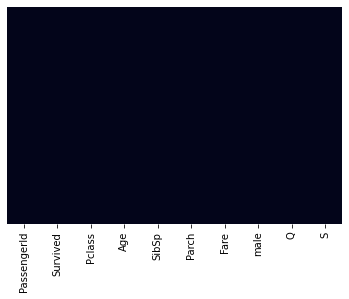

In [125]:
sns.heatmap(titanic_train.isnull(),yticklabels=False, cbar=False)

<AxesSubplot:>

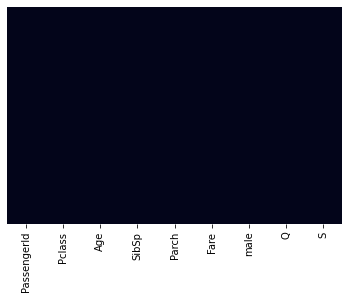

In [126]:
sns.heatmap(titanic_test.isnull(),yticklabels=False, cbar=False)

In [135]:
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
lr = LogisticRegression()

In [133]:
lr.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [139]:
predictions = lr.predict(titanic_test)

In [140]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [146]:
output = pd.concat([titanic_test['PassengerId'], pd.Series(predictions)], axis=1)

In [149]:
output.to_csv('output.csv')